In [145]:
import numpy as np
from numpy import exp, log
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [146]:
omega = 5e-10
x0 = 62 #nm**2
k1 = 0.05 #k_B*T/ nm**2
k2 = 0.01 #k_B*T/ nm**2
epsilon = 80 #k_B*T
E1 = 0.5 * k1 * x0**2 - epsilon # k_B * T
E2 = 0.5 * k2 * x0**2 # k_B * T
w_12 = omega * exp(0.5 * k2 * x0**2)
w_21 = omega * exp(0.5 * k1 * x0**2 - epsilon)

In [147]:
ensem_size = 50_000
tau = 50
ensemble = np.zeros((ensem_size, tau+1))

# generating the initial states!
ensemble[:, 0] = rng.random(size = ensem_size) 
mask = ensemble[:, 0] <= 0.5
ensemble[mask, 0] = 1.
ensemble[~mask, 0] = 2.

for j in range(ensem_size):
    for i in range(1 , tau+1):
        r = rng.random()
        if ensemble[j, i - 1] == 1.:
            if r < w_21:
                ensemble[j, i] = 2.
            else:
                ensemble[j, i] = 1.
        else:
            if r < w_12:
                ensemble[j, i] = 1.
            else:
                ensemble[j, i] = 2
ensemble

array([[1., 1., 1., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [2., 1., 1., ..., 1., 1., 1.]])

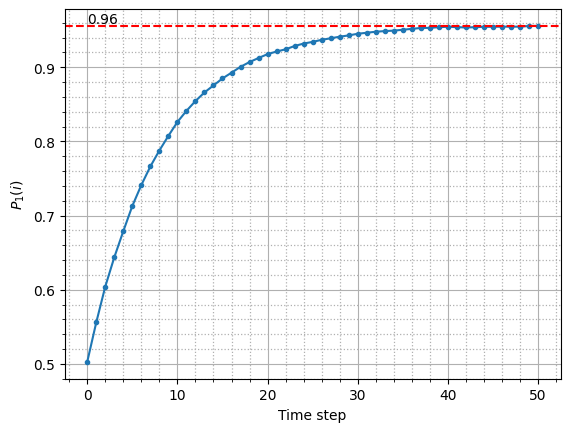

In [148]:
p1 = np.zeros(tau+1)
for i in range(tau+1):
    mask = ensemble[:, i] == 1
    p1[i] = ensemble[mask].shape[0] / ensem_size

plt.plot(np.arange(tau+1), p1, marker = 'o', markersize = 3)
plt.xlabel('Time step')
plt.ylabel('$P_1(i)$')
plt.grid(True, linewidth=0.8)  # Adjust the linewidth for denser grid
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.9')
plt.text(0, p1[tau], f'{p1[tau]:.2f}', ha='left', va='bottom')
plt.axhline(y = p1[tau], color = 'r', linestyle = '--')

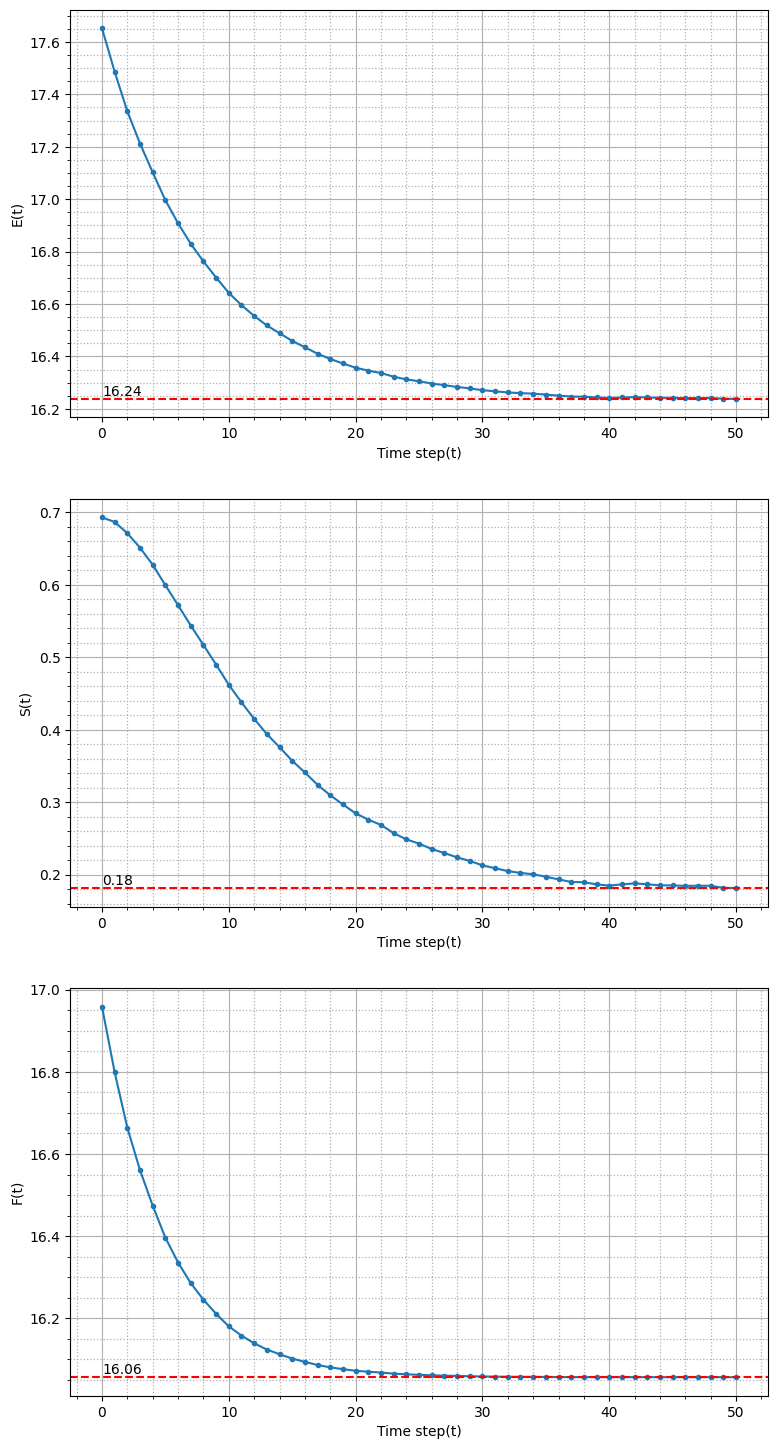

In [149]:
p2 = 1 - p1
E_avg = p1 * E1 + p2 * E2 # k_B T
S = - (p1 * log(p1) + p2 * log(p2)) # k_B
F = E_avg - S # K_B T

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize= (9, 18))
ax1.plot(np.arange(tau+1), E_avg, marker = 'o', markersize = 3)
ax2.plot(np.arange(tau+1), S, marker = 'o', markersize = 3)
ax3.plot(np.arange(tau+1), F, marker = 'o', markersize = 3)

ax1.set_xlabel('Time step(t)')
ax2.set_xlabel('Time step(t)')
ax3.set_xlabel('Time step(t)')

ax1.set_ylabel('E(t)')
ax2.set_ylabel('S(t)')
ax3.set_ylabel('F(t)')

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.minorticks_on()
ax1.grid(True, which='minor', linestyle=':', linewidth='0.9')
ax1.text(0, E_avg[tau], f'{E_avg[tau]:.2f}', ha='left', va='bottom')
ax1.axhline(y = E_avg[tau], color = 'r', linestyle = '--')

ax2.minorticks_on()
ax2.grid(True, which='minor', linestyle=':', linewidth='0.9')
ax2.text(0, S[tau], f'{S[tau]:.2f}', ha='left', va='bottom')
ax2.axhline(y = S[tau], color = 'r', linestyle = '--')

ax3.minorticks_on()
ax3.grid(True, which='minor', linestyle=':', linewidth='0.9')
ax3.text(0, F[tau], f'{F[tau]:.2f}', ha='left', va='bottom')
ax3.axhline(y = F[tau], color = 'r', linestyle = '--')


In [150]:
ensemble[:,tau].astype(int)-1

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
I_v = np.zeros(ensem_size)
E = np.array([E1, E2])
p = np.array([p1, p2])
for i in range(ensem_size):
    I_v[i] = -( log(p[int(ensemble[i, tau])-1][tau]) - log(p[int(ensemble[i,0])-1][0]) 
               + E[int(ensemble[i,tau])-1] - E[int(ensemble[i,0])-1])
  
print(f"The average of I(v) = {np.mean(I_v)}\n and -1/T*(F(tau) - F(0)) = {-F[tau] + F[0]}\n as we can see they are the same!!")

The average of I(v) = 0.9019122577760319
 and -1/T*(F(tau) - F(0)) = 0.9019122577760328
 as we can see they are the same!!


In [152]:
exp_I_v = exp(- I_v)
print(f"The average of exp(-I(v)/k_B) = {np.mean(exp_I_v)}")

The average of exp(-I(v)/k_B) = 0.9999815608681218


In [153]:
exp_I_v

array([1.90139276, 0.08483787, 0.08918376, ..., 1.90139276, 1.90139276,
       0.08483787])

Text(0, 0.5, 'exp(-I_v/k_B)')

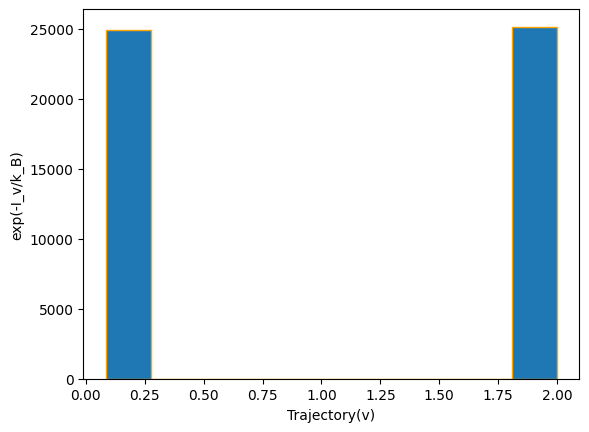

In [154]:
plt.hist(exp_I_v, bins = 10, edgecolor = 'orange')
plt.xlabel('Trajectory(v)')
plt.ylabel('exp(-I_v/k_B)')

# Part b

In [155]:
# second period
sigma = 10
xf = 63.5
x = x0 + np.arange(0,sigma+1) * (xf - x0)/sigma

omega = 5e-10
k1 = 0.05 #k_B*T/ nm**2
k2 = 0.01 #k_B*T/ nm**2
epsilon = 80 #k_B*T
E_2th_per = np.array([0.5 * k1 * x**2 - epsilon, 0.5 * k2 * x**2])
w_12_2 = omega * exp(0.5 * k2 * x**2)
w_21_2 = omega * exp(0.5 * k1 * x**2 - epsilon)

In [156]:
# Third period
xf = 63.5
omega = 5e-10
k1 = 0.05 #k_B*T/ nm**2
k2 = 0.01 #k_B*T/ nm**2
epsilon = 80 #k_B*T
E_3th_per = np.array([0.5 * k1 * xf**2 - epsilon, 0.5 * k2 * xf**2])
w_12_3 = omega * exp(0.5 * k2 * xf**2)
w_21_3 = omega * exp(0.5 * k1 * xf**2 - epsilon)

In [181]:
# generating the ensemble
ensem_size = 100_000
period = 2 * tau +sigma
ensemble = np.zeros((ensem_size, period+1))

# generating the initial states!
ensemble[:, 0] = rng.random(size = ensem_size) 
mask = ensemble[:, 0] <= 0.5
ensemble[mask, 0] = 1.
ensemble[~mask, 0] = 2.

for j in range(ensem_size):
    for i in range(1 , period+1):
        r = rng.random()
        if ensemble[j, i - 1] == 1.:
            if r < w_21:
                ensemble[j, i] = 2.
            else:
                ensemble[j, i] = 1.
        else:
            if r < w_12:
                ensemble[j, i] = 1.
            else:
                ensemble[j, i] = 2
ensemble = ensemble.astype(int)

In [182]:
W_v = np.zeros(ensem_size)
for i in range(tau+1, tau+sigma+1):
    W_v += -(E_2th_per[ensemble[:, i]-1][:, i-tau]
              - E_2th_per[ensemble[:, i]-1][:, i-tau-1])
    
W_v

array([-4.70625  , -3.0008625, -4.70625  , ..., -4.5201375, -4.70625  ,
       -0.94125  ])

## Part f

In [186]:
p1 = np.zeros(period+1)
for i in range(period+1):
    mask = ensemble[:, i] == 1
    p1[i] = ensemble[mask].shape[0] / ensem_size
p2 = 1 - p1
p = np.array([p1, p2])

E_avg_1 = p1[:tau+1] * E1 + p2[:tau+1] * E2
E_avg_2 = p1[tau: tau+sigma+1] * E_2th_per[0] + p2[tau: tau+sigma+1] * E_2th_per[1]
E_avg_3 = p1[tau + sigma:] * E_3th_per[0] + p2[tau + sigma:] * E_3th_per[1]  # k_B T

S = - (p1 * log(p1) + p2 * log(p2)) # k_B
F_tau = E_avg_1[tau] - S[tau] # K_B T
F_2tau_sigma = E_avg_3[tau] - S[2 *tau+sigma]

Delta_F = (F_2tau_sigma - F_tau)
print(f"<exp(beta W)> = {2*np.mean(exp(W_v))/3}\n exp(- beta Delta F) = {exp(-Delta_F)}")

<exp(beta W)> = 0.010074912382589037
 exp(- beta Delta F) = 0.010601052617644062


## Part e

In [189]:
# second period
sigma = 40
xf = 63.5
x = x0 + np.arange(0,sigma+1) * (xf - x0)/sigma

omega = 5e-10
k1 = 0.05 #k_B*T/ nm**2
k2 = 0.01 #k_B*T/ nm**2
epsilon = 80 #k_B*T
E_2th_per = np.array([0.5 * k1 * x**2 - epsilon, 0.5 * k2 * x**2])
w_12_2 = omega * exp(0.5 * k2 * x**2)
w_21_2 = omega * exp(0.5 * k1 * x**2 - epsilon)

# Third period
xf = 63.5
omega = 5e-10
k1 = 0.05 #k_B*T/ nm**2
k2 = 0.01 #k_B*T/ nm**2
epsilon = 80 #k_B*T
E_3th_per = np.array([0.5 * k1 * xf**2 - epsilon, 0.5 * k2 * xf**2])
w_12_3 = omega * exp(0.5 * k2 * xf**2)
w_21_3 = omega * exp(0.5 * k1 * xf**2 - epsilon)

In [191]:
# generating the ensemble
ensem_size = 20_000
period = 2 * tau +sigma
ensemble = np.zeros((ensem_size, period+1))

# generating the initial states!
ensemble[:, 0] = rng.random(size = ensem_size) 
mask = ensemble[:, 0] <= 0.5
ensemble[mask, 0] = 1.
ensemble[~mask, 0] = 2.

for j in range(ensem_size):
    for i in range(1 , period+1):
        r = rng.random()
        if ensemble[j, i - 1] == 1.:
            if r < w_21:
                ensemble[j, i] = 2.
            else:
                ensemble[j, i] = 1.
        else:
            if r < w_12:
                ensemble[j, i] = 1.
            else:
                ensemble[j, i] = 2
ensemble = ensemble.astype(int)

W_v = np.zeros(ensem_size)
for i in range(tau+1, tau+sigma+1):
    W_v += -(E_2th_per[ensemble[:, i]-1][:, i-tau]
              - E_2th_per[ensemble[:, i]-1][:, i-tau-1])
    
p1 = np.zeros(period+1)
for i in range(period+1):
    mask = ensemble[:, i] == 1
    p1[i] = ensemble[mask].shape[0] / ensem_size
p2 = 1 - p1
p = np.array([p1, p2])

E_avg_1 = p1[:tau+1] * E1 + p2[:tau+1] * E2
E_avg_2 = p1[tau: tau+sigma+1] * E_2th_per[0] + p2[tau: tau+sigma+1] * E_2th_per[1]
E_avg_3 = p1[tau + sigma:] * E_3th_per[0] + p2[tau + sigma:] * E_3th_per[1]  # k_B T

S = - (p1 * log(p1) + p2 * log(p2)) # k_B
F_tau = E_avg_1[tau] - S[tau] # K_B T
F_2tau_sigma = E_avg_3[tau] - S[2 *tau+sigma]

Delta_F = (F_2tau_sigma - F_tau)
print(f"<exp(beta W)> = {np.mean(exp(W_v))}\n exp(- beta Delta F) = {exp(-Delta_F)}")


<exp(beta W)> = 0.012545877210448697
 exp(- beta Delta F) = 0.010575349358935943
